In [22]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

con = psycopg2.connect("dbname=moma user=postgres host=localhost port=5432")


def sql_to_df(sql_query: str):
    """Get result set of sql_query as a pandas DataFrame."""
    return pd.read_sql(sql_query, con)

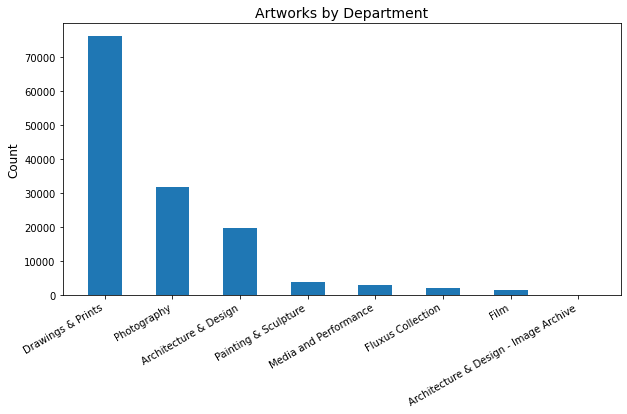

In [23]:
def task1():
    """Perform Task 1."""

    title = "Artworks by Department"
    query = '''SELECT department AS department,count(*)AS count
    FROM moma_works
    Group by department
    Order by count desc
    ;'''
 # TODO task 1

    dataframe = sql_to_df(query)
    _fig, axes = plt.subplots(figsize=(10, 5))
    axes.set_title(title, fontsize=14)

    # get evenly spaced x-axis positions
    xpos = np.arange(len(dataframe))
    # at each x, add bar (height based on count data)
    axes.bar(xpos, dataframe["count"], width=0.50)
    # at each x, add tick mark
    axes.set_xticks(xpos)
    # at each x, add label based on dept data
    axes.set_xticklabels(dataframe["department"])
    # label y-axis
    axes.set_ylabel("Count", fontsize=12)
    # rotate x-axis labels to prevent overlap
    plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

    plt.show()


task1()

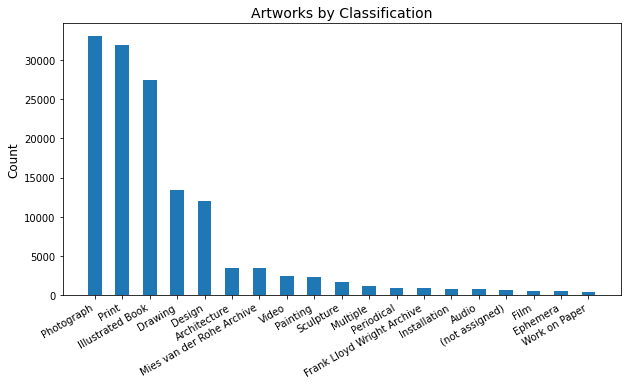

In [24]:
def task2():
    """Perform Task 2."""

    title = "Artworks by Classification"
    query = """SELECT classification AS classification,count(*)AS count
    FROM moma_works
	Group by classification
	HAVING count(*) > 100
    Order by count desc
    ;"""  # TODO task 2

    dataframe = sql_to_df(query)
    _fig, axes = plt.subplots(figsize=(10, 5))
    axes.set_title(title, fontsize=14)

    xpos = np.arange(len(dataframe))
    axes.bar(xpos, dataframe["count"], width=0.50)
    axes.set_xticks(xpos)
    axes.set_xticklabels(dataframe["classification"])
    axes.set_ylabel("Count", fontsize=12)
    plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

    plt.show()


task2()

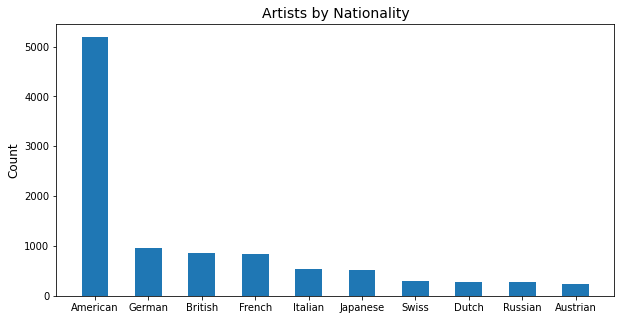

In [25]:
def task3():
    """Perform Task 3."""

    title = "Artists by Nationality"
    query = """SELECT info ->> 'nationality' AS nationality,count(*)AS count
    FROM moma_artists
	WHERE info->>'nationality' is not null
	Group by nationality
    Order by count desc
	LIMIT 10;"""  # TODO task 3

    dataframe = sql_to_df(query)
    _fig, axes = plt.subplots(figsize=(10, 5))
    axes.set_title(title, fontsize=14)

    xpos = np.arange(len(dataframe))
    axes.bar(xpos, dataframe["count"], width=0.50)
    axes.set_xticks(xpos)
    axes.set_xticklabels(dataframe["nationality"])
    axes.set_ylabel("Count", fontsize=12)

    plt.show()


task3()

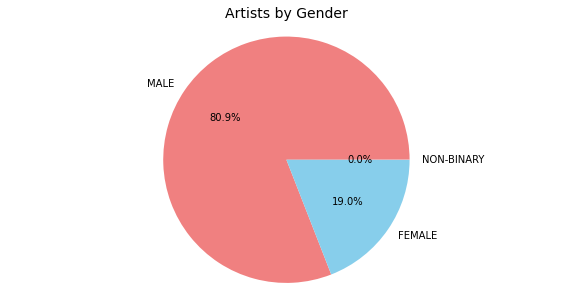

In [26]:
def task4():
    """Perform Task 4."""

    title = "Artists by Gender"
    query = """SELECT UPPER(info ->> 'gender') AS gender, count(*)AS count
    FROM moma_artists
	WHERE info->> 'gender' is not null
	Group by gender
    Order by count desc
	LIMIT 10; """  # TODO task 4

    dataframe = sql_to_df(query)
    fig, axes = plt.subplots(figsize=(10, 5))
    axes.set_title(title, fontsize=14)

    fig.set_facecolor('white')
    axes.pie(
        x=dataframe["count"],
        labels=dataframe["gender"],
        autopct='%1.1f%%',
        colors=['lightcoral', 'skyblue', 'lavender']
    )
    # Equal aspect ratio ensures that pie is drawn as a circle.
    axes.axis('equal')

    plt.show()


task4()

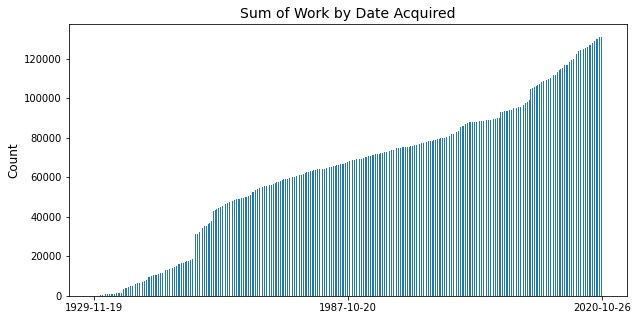

In [27]:
def task5():
    """Perform Task 5."""

    title = "Sum of Work by Date Acquired"  # TODO task 5
    query = """
            WITH daily_acquisition_count AS (
                SELECT date_acquired, COUNT(*) FROM moma_works 
                WHERE date_acquired IS NOT NULL 
                GROUP BY date_acquired
            )
            SELECT date_acquired, SUM(count) 
            OVER (ORDER BY date_acquired) FROM daily_acquisition_count;
            """
    dataframe = sql_to_df(query)
    _fig, axes = plt.subplots(figsize=(10, 5))
    axes.set_title(title, fontsize=14)

    xpos = np.arange(len(dataframe))
    axes.bar(xpos, dataframe["sum"], width=0.50)
    axes.set_xticks([
        0,
        len(dataframe) // 2,
        len(dataframe)
    ])
    axes.set_xticklabels(dataframe.iloc[[
        0,
        len(dataframe) // 2,
        -1
    ]]["date_acquired"])
    axes.set_ylabel("Count", fontsize=12)

    plt.show()


task5()